# Data visualization for tests performed during master thesis

This document contains graphs and other representations of data collected for testing purposes during the master thesis. Bellow are the methods used to analyse the results.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def get_average(list):
    average = 0.0
    for i in range(len(list)):
        average = average+list[i]
    average = average/len(list)
    return average

def get_median(list):
    list.sort()
    median = 0.0
    if(len(list) % 2 == 0):
        median = list[len(list)//2] + (list[len(list)//2+1]-list[len(list)//2])
    else:
        median = list[len(list)//2+1]
    return median 

def get_standard_deviation(mean,values):
    # Calculate variance
    sum_diff = 0
    for i in range(len(values)):
        sum_diff = sum_diff + (values[i]-mean)**2
    variance = sum_diff/(len(values)-1.0)

    standard_deviation = np.sqrt(variance)
    return standard_deviation
    

def read_annotation_results(paths):
    all_feature_counts = []
    all_percentages = []
    all_time_counts = []

    for i in range(number_of_tests):
        feature_counts = []
        percentages = []
        time_counts = []
    
        with open(paths[i], mode ='r')as file:
            csvFile = csv.reader(file)
            line_number = 0
            for lines in csvFile:
                # Skip first line
                if line_number != 0:
                    feature_counts.append(float(lines[2]))
                    # Only read positive percentages
                    if float(lines[4]) >= 0:
                        percentages.append(float(lines[4]))
                    time_counts.append(float(lines[5]))
                line_number = line_number+1
        all_feature_counts.append(feature_counts)
        all_percentages.append(percentages)
        all_time_counts.append(time_counts)
    return all_feature_counts, all_percentages, all_time_counts

def clean_data(data):
    cleaned_data = []
    for i in range(len(data)):
        if data[i] >= 0:
            cleaned_data.append(data[i])
    return cleaned_data

def get_all_statistics(features,percentages,time,n):
    all_feature_medians = []
    all_feature_std = []
    all_feature_averages = []
    all_percentage_medians = []
    all_percentage_std = []
    all_percentage_averages = []
    all_time_medians = []
    all_time_std = []
    all_time_averages = []
    
    for i in range(n):
        feature_average = get_average(features[i])
        feature_median = get_median(features[i])
        percentage_average = get_average(percentages[i])
        percentage_median = get_median(percentages[i])
        time_average = get_average(time[i])
        time_median = get_median(time[i])
    
        all_feature_medians.append(feature_median)
        all_feature_averages.append(feature_average)
        all_percentage_medians.append(percentage_median)
        all_percentage_averages.append(percentage_average)
        all_time_medians.append(time_median)
        all_time_averages.append(time_average)

        feature_std = get_standard_deviation(feature_average,features[i])
        percentage_std = get_standard_deviation(percentage_average,percentages[i])
        time_std = get_standard_deviation(time_average,time[i])
        all_feature_std.append(feature_std)
        all_percentage_std.append(percentage_std)
        all_time_std.append(time_std)
        
    return all_feature_medians, all_feature_averages, all_percentage_medians, all_percentage_averages,all_time_medians, all_time_averages, all_feature_std, all_percentage_std, all_time_std

## Sift test:

The first feature detector tested is sift. Here all the parameters are tested in terms of number of features found, number of features that match the annotated image as well as the time it takes to find the features. During testing only the 1000 best features where kept, due to the fact that too many features would make everything slower as well as make it harder to detect any specific shape amongst them.

### Contrast threshold tests:

The variable that had the most imediate influence on the number of features detected was experienced to be the contrast threshold.
It was therefore the first variable that was tested. The remaining variable where kept constant at their advised values. Those being:<br>
Layers: 3<br>
Edge threshold: 10<br>
Sigma: 1.6<br>
With precise upscaling disabled.<br>

The recorded data can be categorized into three categories. Those being clear video feeds of only pillars, pillars located within tanks and pillars located in crowded environments. The different parameters are tested on each of these categories.

Three videos where categorized as containing only a pillar in an empty underwater environment. From these a total of 150 frames, where taken and annotated for these tests. The frames where taken at an equal interval ensuring that frames from every part of the videos where used.<br>

Four videos where categorized as crowded environments, resulting in 200 frames being analysed. <br>

Three videos where categorized as being in a tank, resulting in 150 frames being analysed. <br>

The test therefore includes a total of 500 frames. <br>

First the test results are read.

In [3]:
import csv

number_of_tests = 11
paths_clear = []
paths_crowded = []
paths_tank = []
contrast_thresholds = [0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008]
# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/contrast_test_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/contrast_test_'+ str(i) +'_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/contrast_test_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_annotation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_annotation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_annotation_results(paths_tank)


Then the data is processed.

In [18]:
# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_features_clear = []
valid_samples_features_crowded = []
valid_samples_features_tank = []

valid_samples_time_clear = []
valid_samples_time_crowded = []
valid_samples_time_tank = []

valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []

for i in range(len(all_feature_counts_clear)):
    all_feature_counts_clear[i] = clean_data(all_feature_counts_clear[i])
    valid_samples_features_clear.append(len(all_feature_counts_clear[i]))
    
for i in range(len(all_feature_counts_crowded)):
    all_feature_counts_crowded[i] = clean_data(all_feature_counts_crowded[i])
    valid_samples_features_crowded.append(len(all_feature_counts_crowded[i]))

for i in range(len(all_feature_counts_tank)):
    all_feature_counts_tank[i] = clean_data(all_feature_counts_tank[i])
    valid_samples_features_tank.append(len(all_feature_counts_tank[i]))

for i in range(len(all_percentages_clear)):
    all_percentages_clear[i] = clean_data(all_percentages_clear[i])
    valid_samples_percentages_clear.append(len(all_percentages_clear[i]))
    
for i in range(len(all_percentages_crowded)):
    all_percentages_crowded[i] = clean_data(all_percentages_crowded[i])
    valid_samples_percentages_crowded.append(len(all_percentages_crowded[i]))

for i in range(len(all_percentages_tank)):
    all_percentages_tank[i] = clean_data(all_percentages_tank[i])
    valid_samples_percentages_tank.append(len(all_percentages_tank[i]))

for i in range(len(all_time_counts_clear)):
    all_time_counts_clear[i] = clean_data(all_time_counts_clear[i])
    valid_samples_time_clear.append(len(all_time_counts_clear[i]))
    
for i in range(len(all_time_counts_crowded)):
    all_time_counts_crowded[i] = clean_data(all_time_counts_crowded[i])
    valid_samples_time_crowded.append(len(all_time_counts_crowded[i]))

for i in range(len(all_time_counts_tank)):
    all_time_counts_tank[i] = clean_data(all_time_counts_tank[i])
    valid_samples_time_tank.append(len(all_time_counts_tank[i]))



# Go through all tests calculating medians and averages
all_feature_medians_clear, all_feature_averages_clear, all_percentage_medians_clear, all_percentage_averages_clear, all_time_medians_clear, all_time_averages_clear,all_feature_std_clear, all_percentage_std_clear, all_time_std_clear = get_all_statistics(all_feature_counts_clear,all_percentages_clear,all_time_counts_clear,number_of_tests)
all_feature_medians_crowded, all_feature_averages_crowded, all_percentage_medians_crowded, all_percentage_averages_crowded, all_time_medians_crowded, all_time_averages_crowded,all_feature_std_crowded, all_percentage_std_crowded, all_time_std_crowded = get_all_statistics(all_feature_counts_crowded,all_percentages_crowded,all_time_counts_crowded,number_of_tests)
all_feature_medians_tank, all_feature_averages_tank, all_percentage_medians_tank, all_percentage_averages_tank, all_time_medians_tank, all_time_averages_tank,all_feature_std_tank, all_percentage_std_tank, all_time_std_tank = get_all_statistics(all_feature_counts_tank,all_percentages_tank,all_time_counts_tank,number_of_tests)




First the actual sample count is analysed:

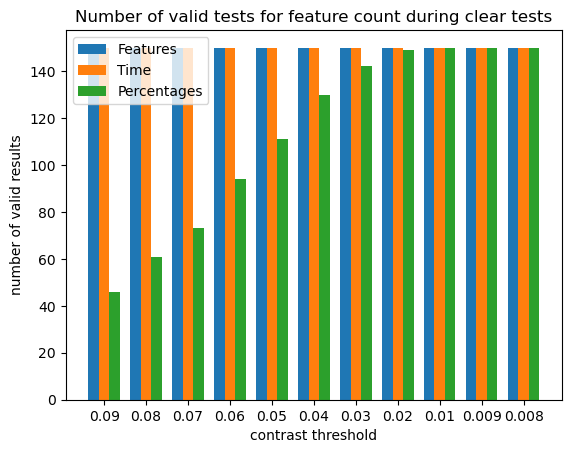

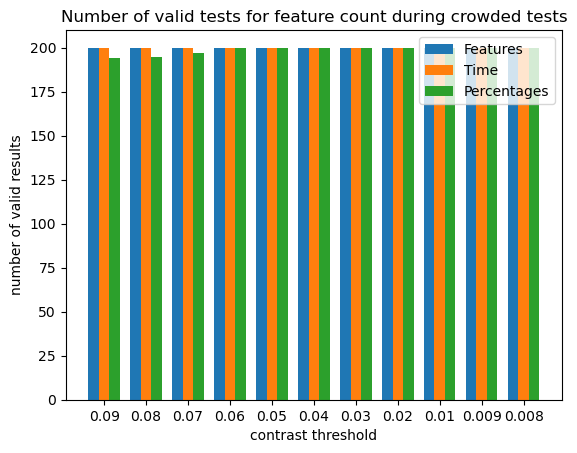

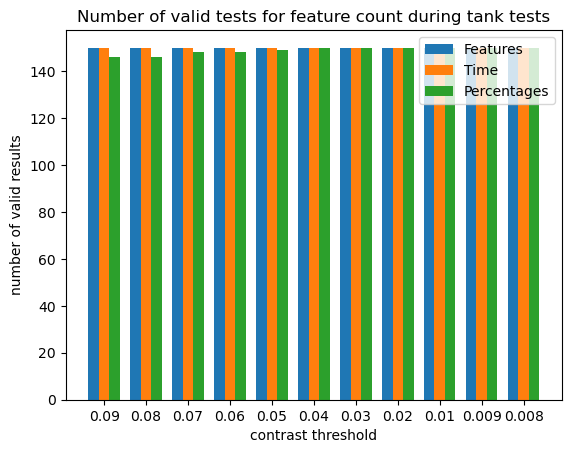

In [5]:
import matplotlib.pyplot as plt
import numpy as np
contrast_thresholds_string = ["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"]

N = 11
ind = np.arange(N)
width = 0.25

bar1 = plt.bar(ind,valid_samples_features_clear,width)
bar2 = plt.bar(ind+width,valid_samples_time_clear,width)
bar3 = plt.bar(ind+width*2,valid_samples_percentages_clear,width)
plt.xlabel("contrast threshold")
plt.ylabel("number of valid results")
plt.title("Number of valid tests for feature count during clear tests")
plt.xticks(ind+width,["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"])
plt.legend((bar1,bar2,bar3),("Features","Time","Percentages"))
plt.show()

bar1 = plt.bar(ind,valid_samples_features_crowded,width)
bar2 = plt.bar(ind+width,valid_samples_time_crowded,width)
bar3 = plt.bar(ind+width*2,valid_samples_percentages_crowded,width)
plt.xlabel("contrast threshold")
plt.ylabel("number of valid results")
plt.title("Number of valid tests for feature count during crowded tests")
plt.xticks(ind+width,["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"])
plt.legend((bar1,bar2,bar3),("Features","Time","Percentages"))
plt.show()

bar1 = plt.bar(ind,valid_samples_features_tank,width)
bar2 = plt.bar(ind+width,valid_samples_time_tank,width)
bar3 = plt.bar(ind+width*2,valid_samples_percentages_tank,width)
plt.xlabel("contrast threshold")
plt.ylabel("number of valid results")
plt.title("Number of valid tests for feature count during tank tests")
plt.xticks(ind+width,["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"])
plt.legend((bar1,bar2,bar3),("Features","Time","Percentages"))
plt.show()


From these results it can be seen that it is only the percentages that are hit by invalid tests. This is due to division by zero being impossible. The clear tests are hit the hardest, since there are less objects in the image resulting in zero features being found more often. <br>

The biggest problem is that high values for the contrast threshold are close to being not statistically significant for the clear tests. <br>

Now the medians and averages are analysed.

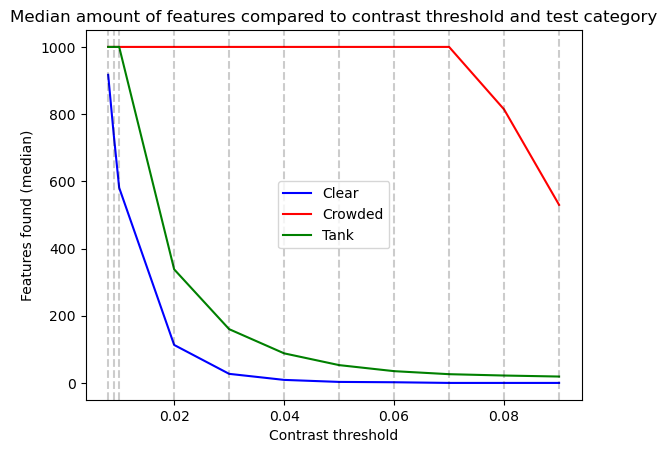

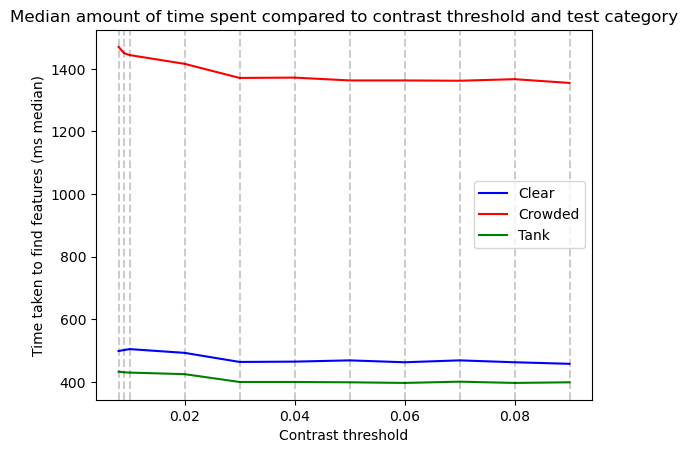

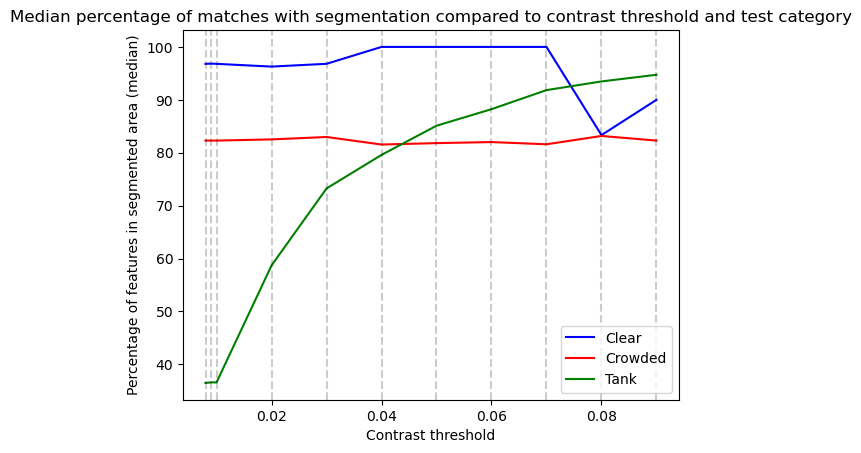

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Medians for all test categories

# Number of features
plt.plot(contrast_thresholds,all_feature_medians_clear,color='b',label="Clear")
plt.plot(contrast_thresholds,all_feature_medians_crowded,color='r',label="Crowded")
plt.plot(contrast_thresholds,all_feature_medians_tank,color='g',label="Tank")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Features found (median)')
plt.title('Median amount of features compared to contrast threshold and test category')
plt.legend()
plt.show()

# Time taken
plt.plot(contrast_thresholds,all_time_medians_clear,color='b',label="Clear")
plt.plot(contrast_thresholds,all_time_medians_crowded,color='r',label="Crowded")
plt.plot(contrast_thresholds,all_time_medians_tank,color='g',label="Tank")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Time taken to find features (ms median)')
plt.title('Median amount of time spent compared to contrast threshold and test category')
plt.legend()
plt.show()

# Percentage match
plt.plot(contrast_thresholds,all_percentage_medians_clear,color='b',label="Clear")
plt.plot(contrast_thresholds,all_percentage_medians_crowded,color='r',label="Crowded")
plt.plot(contrast_thresholds,all_percentage_medians_tank,color='g',label="Tank")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Percentage of features in segmented area (median)')
plt.title('Median percentage of matches with segmentation compared to contrast threshold and test category')
plt.legend()
plt.show()

From these results it is clear that performance is very different in very crowded areas compared to the less crowded counterparts. A slight increase in features can be seen between the clear and tank environments, which might be due to the different colors on the pipe in the tank video feeds (white and blue and gray) compared to the only gray pipes of the clear video feeds. <br>

Features will allways be found in the crowded dataset, having found the maximum amount of features using contrast thresholds up to 0.07. The percentage matches also seem very stable at around the 82 percent across all contrast thresholds. It would therefore be beneficial to have high contrast thresholds in crowded environments since the removed features  dont seem to affect the median match percentage in a negative way. These crowded environment come with a high time cost, that is also seen to be quite stable. The time spent is over 2 times that of the other enviroments at around 1.4 seconds, which is alot, when pseudo real-time is desired. <br>

The tank environment outperforms the clear envrionment in number of features and time taken, which might be due to the background being a finite distance away from the ROV. Its segmentation match behavior is however quite bad for low contrast thresholds, most likely because the wall of the tank is detected. For high thresholds it however performs better than any other environment. <br>

The clear environment performs the worst in terms of amount of features found, but performs quite well in terms of time and percentage segmentation match. <br>

If only crowded terrains existed, a contrast threshold of 0.09 would be the best choice due to having high median segmentation match as well as the lowest time by a low margin. <br>

If only tank environment exists, a contrast threshold of 0.05 - 0.06 would probably be best, since it results in high segmentation match percentage, while still containing some features to work with.

If only clear environments exists, a contrast threshold of 0.02-0.03 would be best, since high segmentation matching is present, while the feature count is not completly in the gutter. <br>

For this reasing i would be inclined to use either 0.03 or 0.04 in order to have high performance in all environments, while keeping the feature count existent for all environments. One would just have to keep fewer features in the complex environments. <br>

The same analysis is performed for the averages.

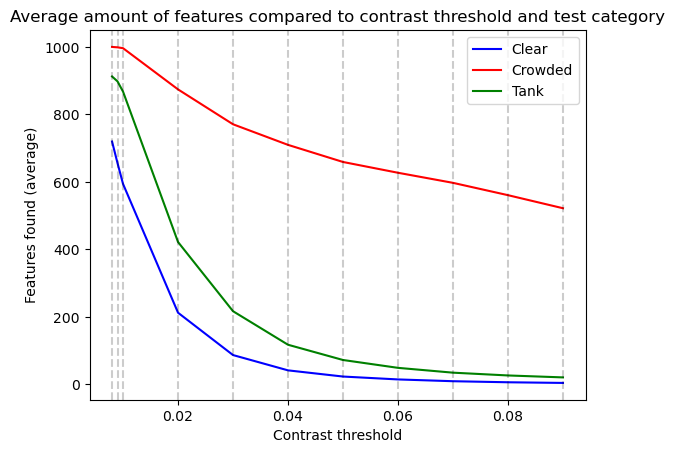

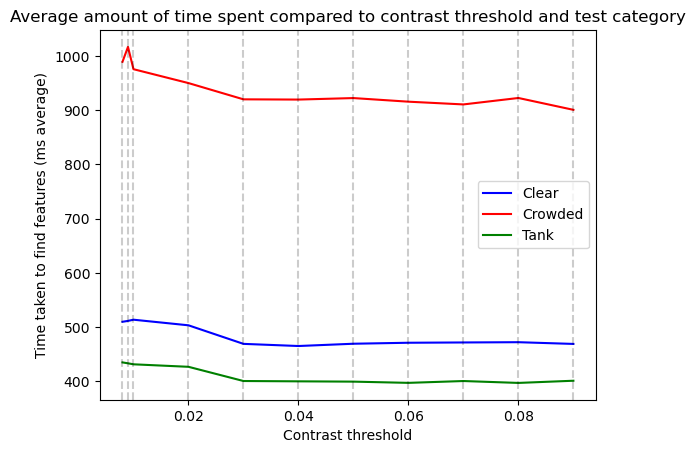

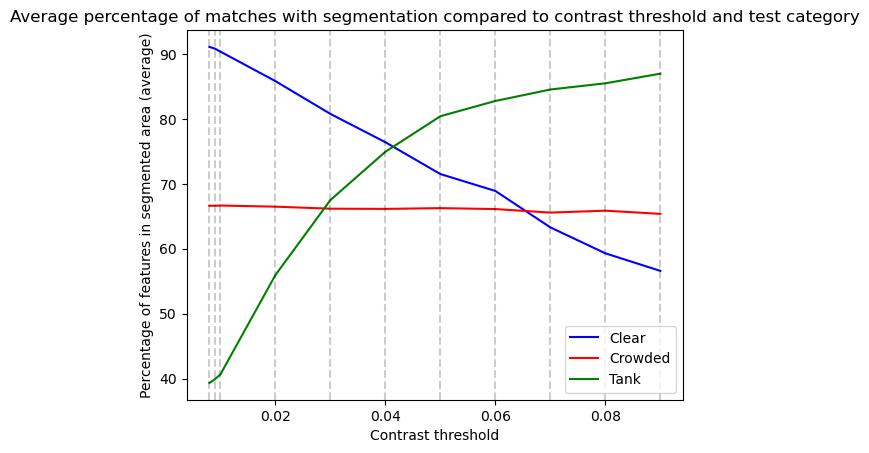

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Averages for all test categories

# Number of features
plt.plot(contrast_thresholds,all_feature_averages_clear,color='b',label="Clear")
plt.plot(contrast_thresholds,all_feature_averages_crowded,color='r',label="Crowded")
plt.plot(contrast_thresholds,all_feature_averages_tank,color='g',label="Tank")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Features found (average)')
plt.title('Average amount of features compared to contrast threshold and test category')
plt.legend()
plt.show()

# Time taken
plt.plot(contrast_thresholds,all_time_averages_clear,color='b',label="Clear")
plt.plot(contrast_thresholds,all_time_averages_crowded,color='r',label="Crowded")
plt.plot(contrast_thresholds,all_time_averages_tank,color='g',label="Tank")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Time taken to find features (ms average)')
plt.title('Average amount of time spent compared to contrast threshold and test category')
plt.legend()
plt.show()

# Percentage match
plt.plot(contrast_thresholds,all_percentage_averages_clear,color='b',label="Clear")
plt.plot(contrast_thresholds,all_percentage_averages_crowded,color='r',label="Crowded")
plt.plot(contrast_thresholds,all_percentage_averages_tank,color='g',label="Tank")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Percentage of features in segmented area (average)')
plt.title('Average percentage of matches with segmentation compared to contrast threshold and test category')
plt.legend()
plt.show()

The averages show a slightly different image. Number of features is pulled upwards for all categories exept the crowded environment that is pulled downwards. The average time taken is also lower for the crowded environments than with the median. The segmentation match graph also now show a clear best universal contrast threshold, slightly above 0.04. This corresponds quite well with the analysis performed for the medium. <br>

The boxplot will be analysed for outliers.

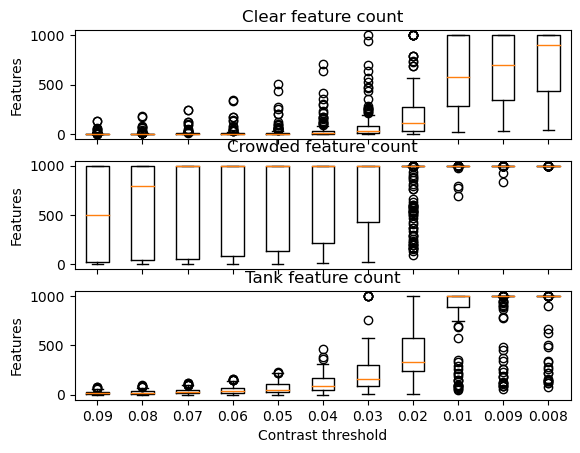

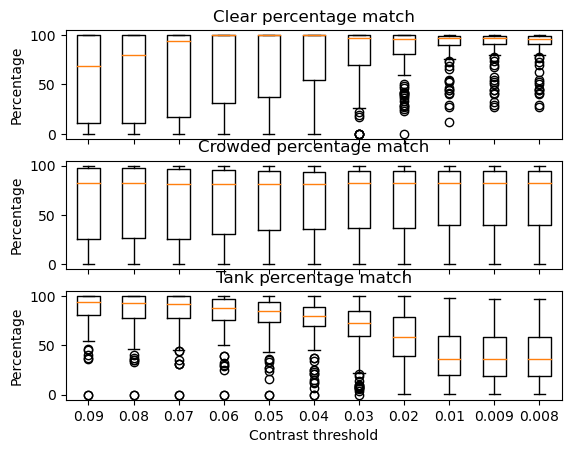

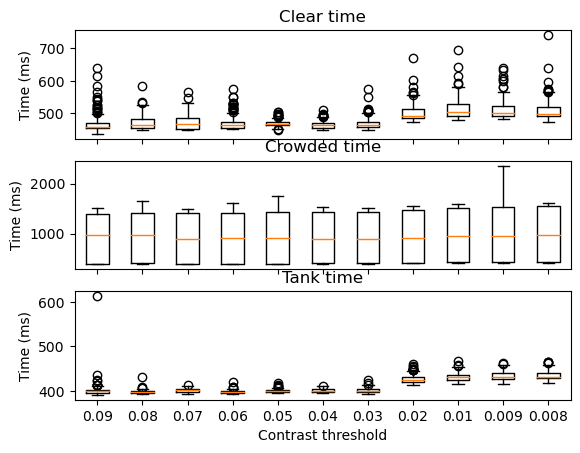

In [96]:
# Create figure of boxplot results for features
figure, axis = plt.subplots(3, 1)
index = 0
datasets = [all_feature_counts_clear, all_feature_counts_crowded, all_feature_counts_tank]
titles = ["Clear feature count", "Crowded feature count", "Tank feature count"]
for i in range(3):
    axis[index].boxplot(datasets[i])
    axis[index].set_title(titles[i])
    axis[index].set_xticklabels(contrast_thresholds)
    index = index+1

for ax in axis.flat:
    ax.set(xlabel='Contrast threshold', ylabel='Features')

for ax in axis.flat:
    ax.label_outer()
    
plt.show()

# Create figure of boxplot results for percentage
figure, axis = plt.subplots(3, 1)
index = 0
datasets = [all_percentages_clear, all_percentages_crowded, all_percentages_tank]
titles = ["Clear percentage match", "Crowded percentage match", "Tank percentage match"]
for i in range(3):
    axis[index].boxplot(datasets[i])
    axis[index].set_title(titles[i])
    axis[index].set_xticklabels(contrast_thresholds)
    index = index+1

for ax in axis.flat:
    ax.set(xlabel='Contrast threshold', ylabel='Percentage')

for ax in axis.flat:
    ax.label_outer()
    
plt.show()

# Create figure of boxplot results for time
figure, axis = plt.subplots(3, 1)
index = 0
datasets = [all_time_counts_clear, all_time_counts_crowded, all_time_counts_tank]
titles = ["Clear time", "Crowded time", "Tank time"]
for i in range(3):
    axis[index].boxplot(datasets[i])
    axis[index].set_title(titles[i])
    axis[index].set_xticklabels(contrast_thresholds)
    index = index+1

for ax in axis.flat:
    ax.set(xlabel='Contrast threshold', ylabel='Time (ms)')

for ax in axis.flat:
    ax.label_outer()
    
plt.show()

From these boxplots it can be seen that there are quite alot of outliers. It can also be seen that many contrast thresholds result in alot of zero readings especially in clear environments. I would therefore be inclined to use 0.03, as a compromise.

The standard deviations will now be looked at.

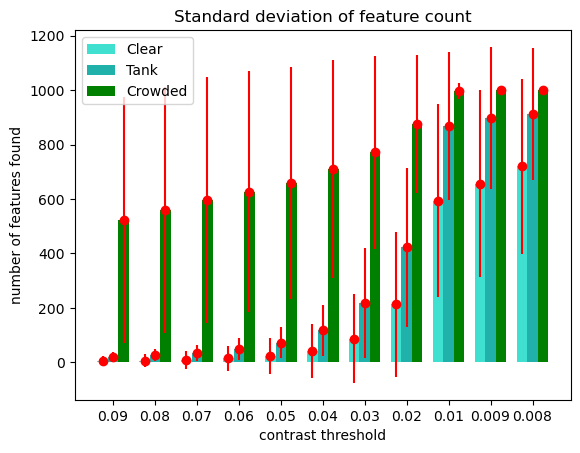

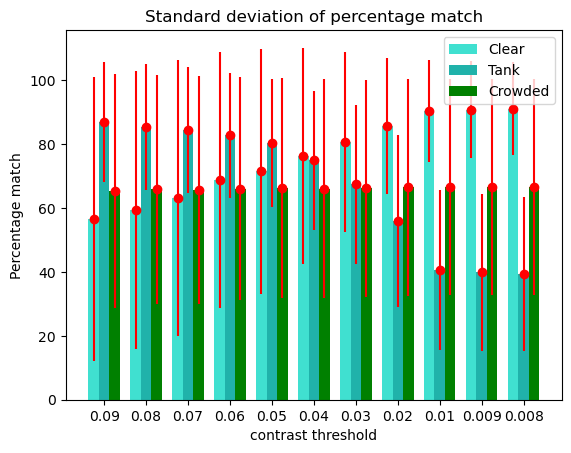

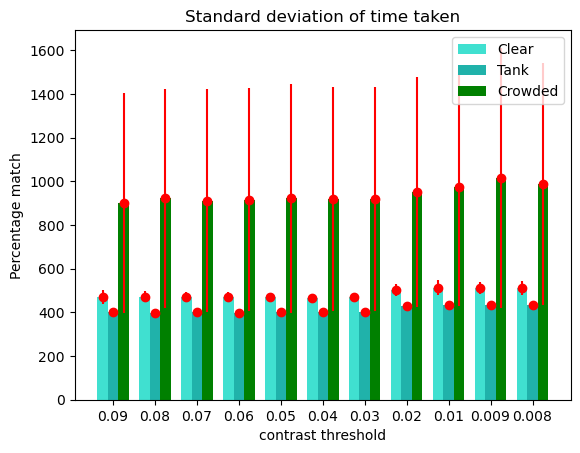

In [201]:
import matplotlib.pyplot as plt
import numpy as np
contrast_thresholds_string = ["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"]

N = 11
ind = np.arange(N)
width = 0.25
bar1 = plt.bar(ind,all_feature_averages_clear,width,color="turquoise")
plt.errorbar(ind, all_feature_averages_clear, yerr=all_feature_std_clear, fmt="o", color="r")
bar2 = plt.bar(ind+width,all_feature_averages_tank,width,color="lightseagreen")
plt.errorbar(ind+width, all_feature_averages_tank, yerr=all_feature_std_tank, fmt="o", color="r")
bar3 = plt.bar(ind+width*2,all_feature_averages_crowded,width,color="green")
plt.errorbar(ind+width*2, all_feature_averages_crowded, yerr=all_feature_std_crowded, fmt="o", color="r")
plt.xlabel("contrast threshold")
plt.ylabel("number of features found")
plt.title("Standard deviation of feature count")
plt.xticks(ind+width,["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"])
plt.legend((bar1,bar2,bar3),("Clear","Tank","Crowded"))
plt.show()

bar1 = plt.bar(ind,all_percentage_averages_clear,width,color="turquoise")
plt.errorbar(ind, all_percentage_averages_clear, yerr=all_percentage_std_clear, fmt="o", color="r")
bar2 = plt.bar(ind+width,all_percentage_averages_tank,width,color="lightseagreen")
plt.errorbar(ind+width, all_percentage_averages_tank, yerr=all_percentage_std_tank, fmt="o", color="r")
bar3 = plt.bar(ind+width*2,all_percentage_averages_crowded,width,color="green")
plt.errorbar(ind+width*2, all_percentage_averages_crowded, yerr=all_percentage_std_crowded, fmt="o", color="r")
plt.xlabel("contrast threshold")
plt.ylabel("Percentage match")
plt.title("Standard deviation of percentage match")
plt.xticks(ind+width,["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"])
plt.legend((bar1,bar2,bar3),("Clear","Tank","Crowded"))
plt.show()

bar1 = plt.bar(ind,all_time_averages_clear,width,color="turquoise")
plt.errorbar(ind, all_time_averages_clear, yerr=all_time_std_clear, fmt="o", color="r")
bar2 = plt.bar(ind+width,all_time_averages_tank,width,color="lightseagreen")
plt.errorbar(ind+width, all_time_averages_tank, yerr=all_time_std_tank, fmt="o", color="r")
bar3 = plt.bar(ind+width*2,all_time_averages_crowded,width,color="green")
plt.errorbar(ind+width*2, all_time_averages_crowded, yerr=all_time_std_crowded, fmt="o", color="r")
plt.xlabel("contrast threshold")
plt.ylabel("Percentage match")
plt.title("Standard deviation of time taken")
plt.xticks(ind+width,["0.09", "0.08", "0.07", "0.06", "0.05", "0.04", "0.03", "0.02", "0.01", "0.009", "0.008"])
plt.legend((bar1,bar2,bar3),("Clear","Tank","Crowded"))
plt.show()

From these barplots it can be seen that both feature count and percentage match have a big variation, while time is pretty constant. Only croweded environment have alot of uncertainty in its time. <br>
Histograms of the desired contrast thresholds will now be analysed. Maybe use Freedman-Diaconis rule.

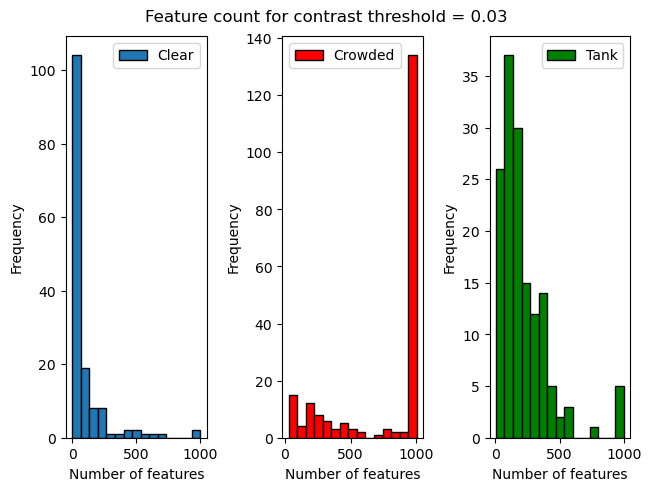

Zero count in clear dataset: 8.000000
Zero count in crowded dataset: 0.000000
Zero count in crowded dataset: 0.000000


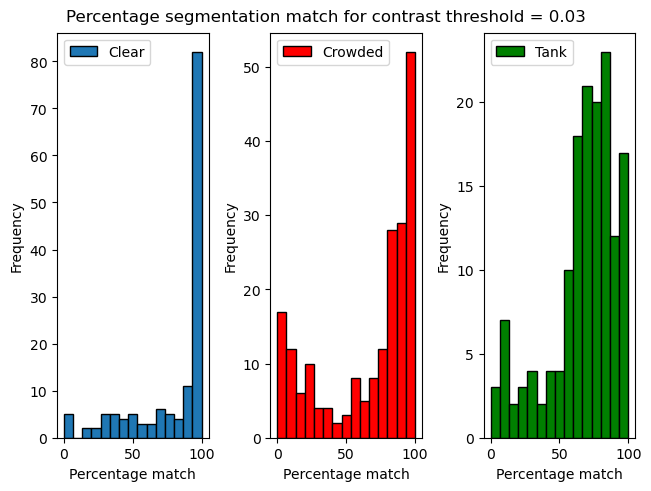

Zero count in clear dataset: 5.000000
Zero count in crowded dataset: 3.000000
Zero count in crowded dataset: 1.000000


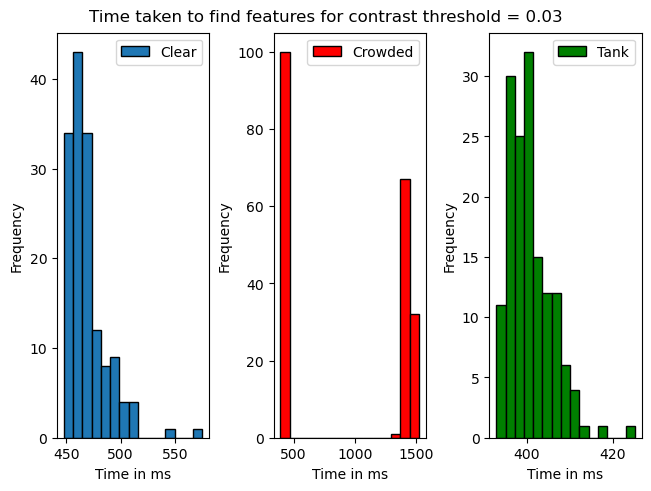

Zero count in clear dataset: 0.000000
Zero count in crowded dataset: 0.000000
Zero count in crowded dataset: 0.000000


In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Feature histotgram for contrast threshold
n_bins = 15
figure, axis = plt.subplot_mosaic([['Clear', 'Crowded','Tank']], layout='constrained')
axis['Clear'].hist(all_feature_counts_clear[6], bins=n_bins, density=False, label='Clear',edgecolor='black')
axis['Crowded'].hist(all_feature_counts_crowded[6], bins=n_bins, density=False, label='Crowded', color="r",edgecolor='black')
axis['Tank'].hist(all_feature_counts_tank[6], bins=n_bins, density=False, label='Tank', color="g",edgecolor='black')

axis['Clear'].set_ylabel('Frequency')
axis['Clear'].set_xlabel('Number of features')
axis['Clear'].legend()
axis['Crowded'].set_ylabel('Frequency')
axis['Crowded'].set_xlabel('Number of features')
axis['Crowded'].legend()
axis['Tank'].set_ylabel('Frequency')
axis['Tank'].set_xlabel('Number of features')
axis['Tank'].legend()
figure.suptitle("Feature count for contrast threshold = 0.03")

plt.show()


# count zeroes
zero_count = 0
for i in range(len(all_feature_counts_clear[6])):
    if all_feature_counts_clear[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in clear dataset: %f" %(zero_count))
zero_count = 0
for i in range(len(all_feature_counts_crowded[6])):
    if all_feature_counts_crowded[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in crowded dataset: %f" %(zero_count))
zero_count = 0
for i in range(len(all_feature_counts_tank[6])):
    if all_feature_counts_tank[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in crowded dataset: %f" %(zero_count))

#  percentage histotgram for contrast threshold
n_bins = 15
figure, axis = plt.subplot_mosaic([['Clear', 'Crowded','Tank']], layout='constrained')
axis['Clear'].hist(all_percentages_clear[6], bins=n_bins, density=False, label='Clear',edgecolor='black')
axis['Crowded'].hist(all_percentages_crowded[6], bins=n_bins, density=False, label='Crowded', color="r",edgecolor='black')
axis['Tank'].hist(all_percentages_tank[6], bins=n_bins, density=False, label='Tank', color="g",edgecolor='black')

axis['Clear'].set_ylabel('Frequency')
axis['Clear'].set_xlabel('Percentage match')
axis['Clear'].legend()
axis['Crowded'].set_ylabel('Frequency')
axis['Crowded'].set_xlabel('Percentage match')
axis['Crowded'].legend()
axis['Tank'].set_ylabel('Frequency')
axis['Tank'].set_xlabel('Percentage match')
axis['Tank'].legend()
figure.suptitle("Percentage segmentation match for contrast threshold = 0.03")

plt.show()

# count zeroes
zero_count = 0
for i in range(len(all_percentages_clear[6])):
    if all_percentages_clear[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in clear dataset: %f" %(zero_count))
zero_count = 0
for i in range(len(all_percentages_crowded[6])):
    if all_percentages_crowded[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in crowded dataset: %f" %(zero_count))
zero_count = 0
for i in range(len(all_percentages_tank[6])):
    if all_percentages_tank[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in crowded dataset: %f" %(zero_count))


#  time histotgram for contrast threshold
n_bins = 15
figure, axis = plt.subplot_mosaic([['Clear', 'Crowded','Tank']], layout='constrained')
axis['Clear'].hist(all_time_counts_clear[6], bins=n_bins, density=False, label='Clear',edgecolor='black')
axis['Crowded'].hist(all_time_counts_crowded[6], bins=n_bins, density=False, label='Crowded', color="r",edgecolor='black')
axis['Tank'].hist(all_time_counts_tank[6], bins=n_bins, density=False, label='Tank', color="g",edgecolor='black')

axis['Clear'].set_ylabel('Frequency')
axis['Clear'].set_xlabel('Time in ms')
axis['Clear'].legend()
axis['Crowded'].set_ylabel('Frequency')
axis['Crowded'].set_xlabel('Time in ms')
axis['Crowded'].legend()
axis['Tank'].set_ylabel('Frequency')
axis['Tank'].set_xlabel('Time in ms')
axis['Tank'].legend()
figure.suptitle("Time taken to find features for contrast threshold = 0.03")

plt.show()

# count zeroes
zero_count = 0
for i in range(len(all_time_counts_clear[6])):
    if all_time_counts_clear[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in clear dataset: %f" %(zero_count))
zero_count = 0
for i in range(len(all_time_counts_crowded[6])):
    if all_time_counts_crowded[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in crowded dataset: %f" %(zero_count))
zero_count = 0
for i in range(len(all_time_counts_tank[6])):
    if all_time_counts_tank[6][i] == 0.0:
        zero_count = zero_count+1
print("Zero count in crowded dataset: %f" %(zero_count))

The reason that crowded takes more time, is due to half the dataset having larger dimensions as seen in the histogram. The histogram shows promising results with a bit too low feature count tendency. It is however seen that only few test results actually hit the 0-feature mark, which is good. <br>

A second test has been created to analyse how consistent the features are. Here the focus will be on how many matches we have between the current and last frame

The final chosen contrast threshold is: 0.03 <br>
While the test contrast threshold is: 0.02 <br>
Even though 0.03 and 0.04 would perform better, 0.02 produces more features which is beneficial, when testing the rest of the parameters. 

### Edge threshold tests:
The remaining variable where kept constant at the following values:<br>
Layers: 3<br>
Contrast threshold: 0.02<br>
Sigma: 1.6<br>
With precise upscaling disabled.<br>

The data is read:

In [ ]:
import csv

number_of_tests = 11
paths_clear = []
paths_crowded = []
paths_tank = []
edge_thresholds = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/edge_test_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/edge_test_'+ str(i) +'_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/edge_test_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_annotation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_annotation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_annotation_results(paths_tank)